In [1]:
# To help you get started...
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


data_1 = pd.read_csv('exampleco_data/machine_1.csv')
data_1.columns = ['Time', '0', '1', '2', '3']
data_1['Time'] = pd.to_datetime(data_1['Time'])
data_1.index = data_1['Time']

In [2]:
data_1.head(15)

,Time,0,1,2,3
Time,,,,,
2019-01-01 00:00:00.000000000,2019-01-01 00:00:00.000000000,12.588243,8.829718,-11.803474,10.083107
2019-01-01 08:00:09.603201067,2019-01-01 08:00:09.603201067,10.822199,2.795246,11.560279,21.898688
2019-01-01 16:00:19.206402134,2019-01-01 16:00:19.206402134,21.074661,-0.655051,-17.840580,-1.346748
2019-01-02 00:00:28.809603201,2019-01-02 00:00:28.809603201,32.284431,6.544655,-13.498907,-4.281704
2019-01-02 08:00:38.412804268,2019-01-02 08:00:38.412804268,28.073949,253.681988,271.983917,263.627071
2019-01-02 16:00:48.016005335,2019-01-02 16:00:48.016005335,29.629862,-3.518698,3.365019,-2.995649
2019-01-03 00:00:57.619206402,2019-01-03 00:00:57.619206402,38.890203,1.919590,-10.845336,-17.723077
2019-01-03 08:01:07.222407469,2019-01-03 08:01:07.222407469,33.052775,3.211291,25.462723,1.146398
2019-01-03 16:01:16.825608536,2019-01-03 16:01:16.825608536,25.185709,-5.489062,22.950995,-3.462269


In [3]:
# TO-DO: Create a function to plot all 4 time series plots together using subplots.
def plot_time_series(df):
    plt.figure(figsize = (15, 5))
    plt.subplot(2, 2, 1)
    plt.plot((df.index), df['0'])
    plt.subplot(2, 2, 2)
    plt.plot(df.index, df['1'])
    plt.subplot(2, 2, 3)
    plt.plot(df.index, df['2'])
    plt.subplot(2, 2, 4)
    plt.plot(df.index, df['3'])   

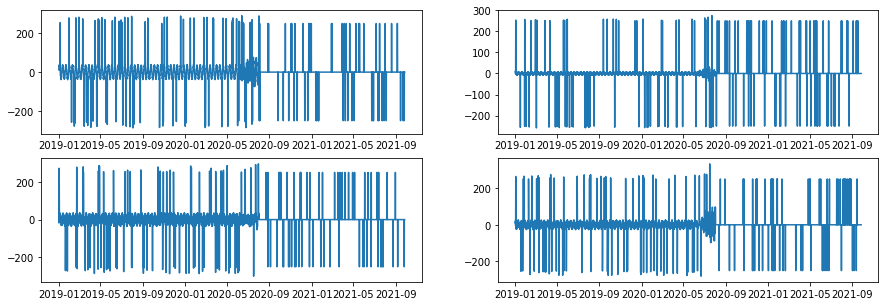

In [4]:
plot_time_series(data_1)

In [5]:
def remove_outliers(df):
    for i in range(4):
        data = df[str(i)]
        up_limit = data.mean() + (2 * data.std())
        down_limit = data.mean() - (2 * data.std())
        for j in range(len(data)): 
            if(data[j] > up_limit or data[j] < down_limit):
                if(j > 5):
                    data[j] = data[j-5:j+5].median()
                else:
                    data[j] = data[j:j+5].median()
        df[str(i)] = data  
    return df        

In [6]:
clean_data_1 = remove_outliers(data_1)

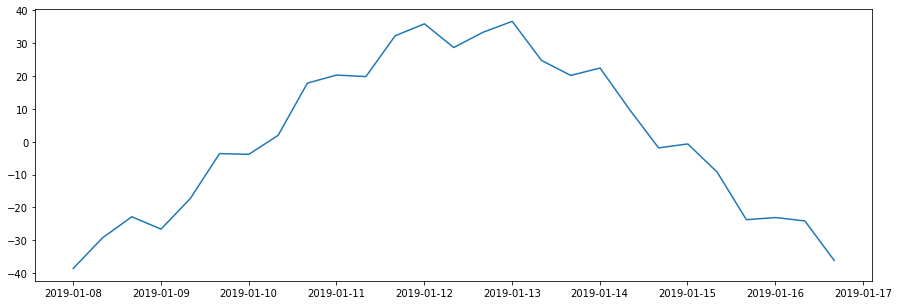

In [7]:
plt.figure(figsize = (15, 5))
plt.plot(clean_data_1[21:48].index, clean_data_1[21:48]['0'])

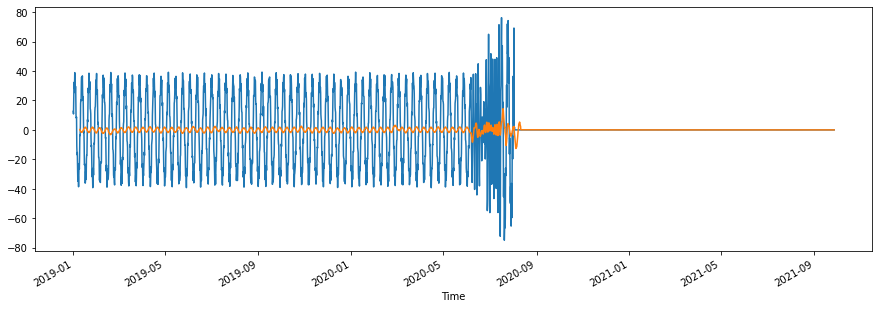

In [8]:
plt.figure(figsize = (15, 5))
clean_data_1['0'].plot()
rm = clean_data_1.rolling(window = 27).mean() 
rm['0'].plot()

In [9]:
rm.head(10)

,0,1,2,3
Time,,,,
2019-01-01 00:00:00.000000000,NaN,NaN,NaN,NaN
2019-01-01 08:00:09.603201067,NaN,NaN,NaN,NaN
2019-01-01 16:00:19.206402134,NaN,NaN,NaN,NaN
2019-01-02 00:00:28.809603201,NaN,NaN,NaN,NaN
2019-01-02 08:00:38.412804268,NaN,NaN,NaN,NaN
2019-01-02 16:00:48.016005335,NaN,NaN,NaN,NaN
2019-01-03 00:00:57.619206402,NaN,NaN,NaN,NaN
2019-01-03 08:01:07.222407469,NaN,NaN,NaN,NaN
2019-01-03 16:01:16.825608536,NaN,NaN,NaN,NaN


-0.03714155046658263
0.059855256924235684

IF
54


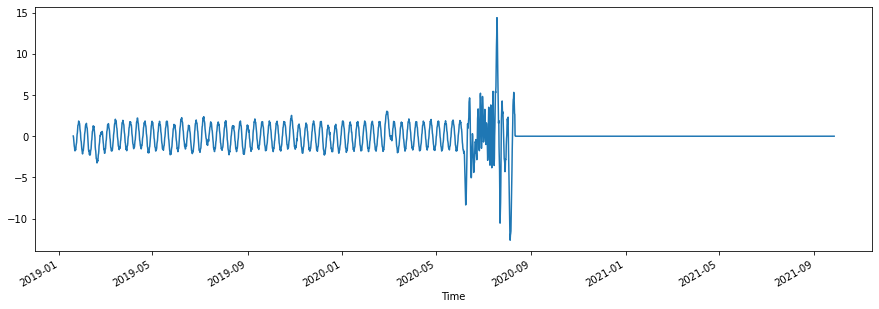

In [10]:
window_means = [np.average(rm[27:54]['0'])]
for i in range(54, len(rm), 27):
    current_win_mean = rm[i:i+27]['0'].mean()
    old_win_mean = np.average(window_means)
    print(current_win_mean)
    print(old_win_mean)
    print()
    if(current_win_mean < (0.2 * old_win_mean)):
        print("IF")
        print(i)
        plt.figure(figsize = (15, 5))
        rm[i:]['0'].plot()
        break
    else:
        print("ELSE")
        window_means.append(current_win_mean)
    